Write a program to implement Autoencoder,Alexnet,Lnet5 and VGG16 on MNIST dataset and compare results of each in terms of time and accuracy

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np
import time

Implementation using autoencoder

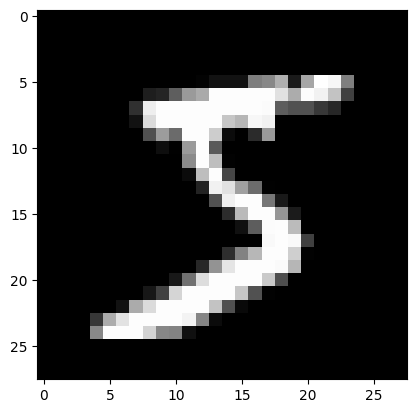

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [ ]:
LATENT_SIZE = 32
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="sigmoid"),
])

In [ ]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [ ]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

1/1 [==============================] - 0s 20ms/step


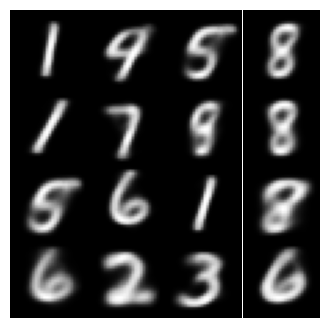

----------- EPOCH 9 -----------
938/938 [==============================] - 7s 7ms/step - loss: 0.1851


In [ ]:
start=time.time()
EPOCHS = 10
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = 64)
end=time.time()

In [ ]:
print("Time required : ",end-start,' s')

Time required :  136.65483808517456  s


Alexnet

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
X_train /= 255
X_valid /= 255

In [ ]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [ ]:
model = Sequential()

# first conv-pool block: 
model.add(Conv2D(96, kernel_size=(11, 11), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(BatchNormalization())

# second conv-pool block: 
model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(BatchNormalization())

# third conv-pool block: 
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(BatchNormalization())

# dense layers: 
model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))

# output layer: 
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 18, 18, 96)        11712     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 16, 16, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 10, 10, 256)      0         
 g2D)                                                            
                                                     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
start=time.time()
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))
end=time.time()

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0902 - accuracy: 0.9732 - val_loss: 0.0770 - val_accuracy: 0.9766
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0853 - accuracy: 0.9743 - val_loss: 0.0725 - val_accuracy: 0.9777
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0810 - accuracy: 0.9757 - val_loss: 0.0716 - val_accuracy: 0.9771
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0775 - accuracy: 0.9768 - val_loss: 0.0715 - val_accuracy: 0.9775
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0736 - accuracy: 0.9778 - val_loss: 0.0666 - val_accuracy: 0.9789
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0703 - accuracy: 0.9789 - val_loss: 0.0679 - val_accuracy: 0.9772
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0674 - accuracy: 0.9797 - val_loss: 0.0626 - val_accuracy: 0.9804
Epoch 

In [ ]:
print('Time required : ',end-start,' s')

Time required :  41.32006621360779  s


Lnet5

In [ ]:
model = Sequential()
  
# Convolutional layer  
model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
  
# Max-pooing layer with pooling window size is 2x2
model.add(MaxPooling2D(pool_size = (2,2)))
  
# Convolutional layer 
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  
# Max-pooling layer 
model.add(MaxPooling2D(pool_size = (2,2)))
  
# Flatten layer 
model.add(Flatten())
  
# The first fully connected layer 
model.add(Dense(120, activation = 'relu'))
  
# The output layer  
model.add(Dense(10, activation = 'softmax'))

In [ ]:
opt = SGD(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', 
                optimizer = opt, 
                metrics = ['accuracy']) 
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 400)               0         
                                                                 
 dense_25 (Dense)            (None, 120)             

In [ ]:
start=time.time()
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))
end=time.time()

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 1.1983 - accuracy: 0.6332 - val_loss: 0.3866 - val_accuracy: 0.8893
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3164 - accuracy: 0.9058 - val_loss: 0.2585 - val_accuracy: 0.9204
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2320 - accuracy: 0.9303 - val_loss: 0.1875 - val_accuracy: 0.9463
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1860 - accuracy: 0.9434 - val_loss: 0.1526 - val_accuracy: 0.9545
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1546 - accuracy: 0.9537 - val_loss: 0.1436 - val_accuracy: 0.9578
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1332 - accuracy: 0.9597 - val_loss: 0.1156 - val_accuracy: 0.9666
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1177 - accuracy: 0.9655 - val_loss: 0.1054 - val_accuracy: 0.9679
Epoch 

In [ ]:
print('Time required : ',end-start,' s')

Time required :  41.83772587776184  s


VGG16

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [ ]:
model2=Sequential()
model2.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model2.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model2.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(4096,activation='relu'))
model2.add(Dense(4096,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [ ]:
opt = SGD(lr = 0.01)
model2.compile(loss = 'categorical_crossentropy', 
                optimizer = opt, 
                metrics = ['accuracy']) 
model2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_144 (Conv2D)         (None, 24, 24, 64)        1664      
                                                                 
 conv2d_145 (Conv2D)         (None, 20, 20, 64)        102464    
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_146 (Conv2D)         (None, 6, 6, 128)         204928    
                                                                 
 conv2d_147 (Conv2D)         (None, 2, 2, 128)         409728    
                                                                 
 flatten_14 (Flatten)        (None, 512)               0         
                                                     

In [ ]:
start=time.time()
model2.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))
end=time.time()

Epoch 1/10
469/469 [==============================] - 11s 19ms/step - loss: 1.6220 - accuracy: 0.5539 - val_loss: 0.4456 - val_accuracy: 0.8619
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3215 - accuracy: 0.9005 - val_loss: 0.2695 - val_accuracy: 0.9171
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2013 - accuracy: 0.9375 - val_loss: 0.1796 - val_accuracy: 0.9440
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1490 - accuracy: 0.9535 - val_loss: 0.1158 - val_accuracy: 0.9647
Epoch 5/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1199 - accuracy: 0.9630 - val_loss: 0.0973 - val_accuracy: 0.9688
Epoch 6/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0986 - accuracy: 0.9690 - val_loss: 0.0865 - val_accuracy: 0.9710
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0855 - accuracy: 0.9733 - val_loss: 0.0886 - val_accuracy: 0.970

In [ ]:
print('Time required : ',end-start,' s')

Time required :  142.98354578018188  s
